In [20]:
import os
import nrrd

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ioutil import sample_paths

sns.set()
%matplotlib inline

# GTV reduction

In [21]:
path_orig_masks = './../../data_source/images/masks_nrrd'
path_red_masks = './../../data_source/images/masks_removed_broken_slices_ct_size'

path_to_files = sample_paths(path_orig_masks, path_red_masks, target_format='nrrd')

red_volume = []
for path_to_file in path_to_files:
    
    orig_mask, _ = nrrd.read(path_to_file['Image'])
    red_mask, _ = nrrd.read(path_to_file['Mask'])
    
    red_volume.append(np.sum(red_mask) / np.sum(orig_mask))

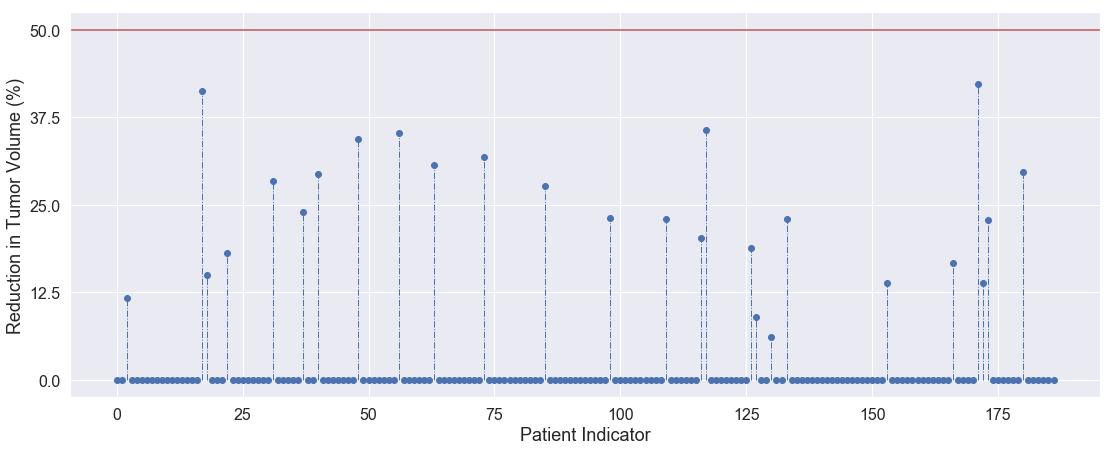

In [54]:
# The fraction of GTV removed by discarding damaged slices.
x_coords = np.arange(len(red_volume))

plt.figure(figsize=(15, 6))
sns.scatterplot(
    x_coords, 100 - (np.array(red_volume) * 100)
)
markerline, stemlines, baseline = plt.stem(
    x_coords, 100 - (np.array(red_volume) * 100), 
    linefmt='b-.', markerfmt='bo', bottom=0
)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(baseline, 'linewidth', 0)


plt.axhline(y=50, c='r')
plt.tight_layout()
plt.xlabel('Patient Indicator', fontsize=18)
plt.ylabel('Reduction in Tumor Volume (%)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(np.linspace(0.0, 50, 5), np.linspace(0.0, 50, 5), fontsize=16)
plt.savefig(
    './../../figures/removing_damaged_slices/frac_gtv_removed.png', 
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

# Statistical Difference Test

**Notes**
* In applied machine learning, we often need to determine whether two data samples have the same or different distributions.
* We can answer this question using statistical significance tests that can quantify the likelihood that the samples have the same distribution.
* If the data does not have the familiar Gaussian distribution, we must resort to nonparametric version of the significance tests.
* These tests operate in a similar manner, but are distribution free, requiring that real valued data be first transformed into rank data before the test can be performed.

**Hypothesis**
* p <= alpha: reject H0, different distribution.
* p > alpha: fail to reject H0, same distribution.


**Wilcoxon Signed-Rank Test**

* The data samples are paired.
* The Wilcoxon signed ranks test is a nonparametric statistical procedure for comparing two samples that are paired, or related. The parametric equivalent to the Wilcoxon signed ranks test goes by names such as the Student’s t-test, t-test for matched pairs, t-test for paired samples, or t-test for dependent samples.
* The default assumption for the test, the null hypothesis, is that the two samples have the same distribution.
    - Fail to Reject H0: Sample distributions are equal.
    - Reject H0: Sample distributions are not equal.

**REF:** Pages 38-39, Nonparametric Statistics for Non-Statisticians: A Step-by-Step Approach, 2009.



In [13]:
# See: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import wilcoxon

In [14]:
orig_firstorder = pd.read_csv(
    './../../data_source/to_analysis/original_images/firstorder_original_images.csv',
    index_col=0
)
rs_firstorder = pd.read_csv(
    './../../data_source/to_analysis/removed_broken_slices/firstorder_removed_broken_slices.csv',
    index_col=0
)

In [15]:
orig_texture = pd.read_csv(
    './../../data_source/to_analysis/original_images/texture_original_images.csv',
    index_col=0
)
rs_texture = pd.read_csv(
    './../../data_source/to_analysis/removed_broken_slices/texture_removed_broken_slices.csv',
    index_col=0
)

In [16]:
firstorder_pvalues = []
for col in orig_firstorder:
    _, p_value = wilcoxon(
        rs_firstorder.loc[:, col].values,
        orig_firstorder.loc[rs_firstorder.index, col].values
    )
    firstorder_pvalues.append(p_value)    
    #if p > alpha:
    #    print('Same distribution (fail to reject H0)')
    #else:
    #    print('Different distribution (reject H0)')

/anaconda3/envs/biorad/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/anaconda3/envs/biorad/lib/python3.6/site-packages/scipy/stats/morestats.py:2803: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


In [17]:
texture_pvalues = []
for col in orig_texture:
    try:
        _, p_value = wilcoxon(
            rs_texture.loc[:, col].values,
            orig_texture.loc[rs_texture.index, col].values
        )
        texture_pvalues.append(p_value)
    except:
        pass
    #if p > alpha:
    #    print('Same distribution (fail to reject H0)')
    #else:
    #    print('Different distribution (reject H0)')

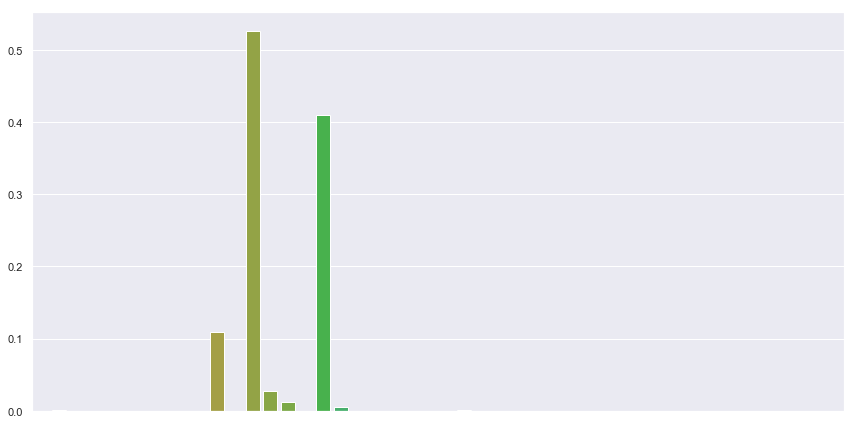

In [18]:
x_coords = np.arange(len(firstorder_pvalues))

plt.figure(figsize=(12, 6))
sns.barplot(
    x=x_coords,
    y=firstorder_pvalues
)
plt.xticks([], [])
plt.tight_layout()

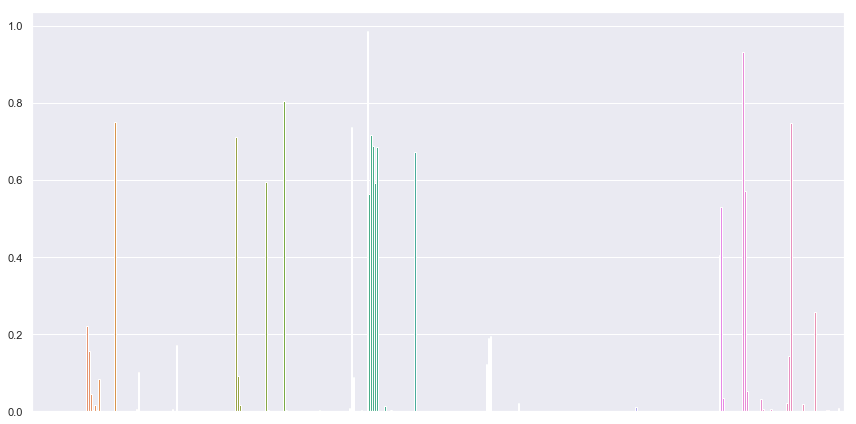

In [19]:
x_coords = np.arange(len(texture_pvalues))

plt.figure(figsize=(12, 6))
sns.barplot(
    x=x_coords,
    y=texture_pvalues
)
plt.xticks([], [])
plt.tight_layout()